# 1. Project introduction

## Background on Enron fraud
The enron scandal was the single biggest financial in the history of American economy. The company, which at its peak had a share worth \$90.75, declared bankruptcy on Decembmer 2001, plummeting the value to \$0.67 by January the next year. Numerous executives and accountants were prosecuted, including the founder and former CEO Kenneth Lay. Many more suffered from the collapse, losing jobs and large sums of money.

## Goal of project
The goal of this project is to identify persons of interst (those convicted, indicted, or have testified in the court) with publicly available financial and email data, using machine learning.


# 2. Exploratory Data Analysis

## Data Preparation

In [1]:
# import necessary modules
# other modules will be called when needed

import numpy as np # for numerical computations
import matplotlib.pyplot as plt # for graphing
import seaborn as sns # for extra plots such as heatmap
import pickle # for loading and dumping pickle dataset files
import pandas as pd # for easy exploratory data analysis in dataframe format
from time import time # to measure ML process time
import sys
sys.path.append('ud120-projects/tools')
from feature_format import featureFormat, targetFeatureSplit
# for transforming dictionary to np arrays and split between
# target and predictors

In [2]:
# import dataset as a dictionary
data_dict = pickle.load(open('ud120-projects/final_project/final_project_dataset.pkl', 'rb'))

# look at the keys
print(data_dict.keys())

# look at one entry as an example to see the general format
print('\n',data_dict['METTS MARK'])

# number of observations
print('\nThere are {} observation in the dataset.'.format(len(data_dict)))

# number of pois(target)
count = 0
for i in data_dict:
    if data_dict[i]['poi']:
        count += 1
print('\nThere are {} pois in the dataset.'.format(count))

# number of non-pois
print('\nThere are {} non-pois in the dataset.'.format(len(data_dict) - count))

# number of variables
print('\nThere are {} predictor variables and 1 target variable in the dataset.'.format(len(data_dict['METTS MARK'])-1))

dict_keys(['METTS MARK', 'BAXTER JOHN C', 'ELLIOTT STEVEN', 'CORDES WILLIAM R', 'HANNON KEVIN P', 'MORDAUNT KRISTINA M', 'MEYER ROCKFORD G', 'MCMAHON JEFFREY', 'HAEDICKE MARK E', 'PIPER GREGORY F', 'HUMPHREY GENE E', 'NOLES JAMES L', 'BLACHMAN JEREMY M', 'SUNDE MARTIN', 'GIBBS DANA R', 'LOWRY CHARLES P', 'COLWELL WESLEY', 'MULLER MARK S', 'JACKSON CHARLENE R', 'WESTFAHL RICHARD K', 'WALTERS GARETH W', 'WALLS JR ROBERT H', 'KITCHEN LOUISE', 'CHAN RONNIE', 'BELFER ROBERT', 'SHANKMAN JEFFREY A', 'WODRASKA JOHN', 'BERGSIEKER RICHARD P', 'URQUHART JOHN A', 'BIBI PHILIPPE A', 'RIEKER PAULA H', 'WHALEY DAVID A', 'BECK SALLY W', 'HAUG DAVID L', 'ECHOLS JOHN B', 'MENDELSOHN JOHN', 'HICKERSON GARY J', 'CLINE KENNETH W', 'LEWIS RICHARD', 'HAYES ROBERT E', 'KOPPER MICHAEL J', 'LEFF DANIEL P', 'LAVORATO JOHN J', 'BERBERIAN DAVID', 'DETMERING TIMOTHY J', 'WAKEHAM JOHN', 'POWERS WILLIAM', 'GOLD JOSEPH', 'BANNANTINE JAMES M', 'DUNCAN JOHN H', 'SHAPIRO RICHARD S', 'SHERRIFF JOHN R', 'SHELBY REX', 'LEMA

In [6]:
# there is a weird entry called 'THE TRAVEL AGENCY IN THE PARK'
# let's check what this entry is

data_dict['THE TRAVEL AGENCY IN THE PARK']

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [7]:
# This entry only has other and total_payments value
# the enron insider payment pdf states that this is payment
# made to an agency by employees for business travels
# let's get rid of this entry

data_dict.pop('THE TRAVEL AGENCY IN THE PARK')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 362096,
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 362096,
 'total_stock_value': 'NaN'}

In [4]:
# There is also another entry that doesn't add value to the data
# as there are only NaN values for all the variables.
# It does have the target variable filled in,
# but without any predictive variables, this is not of big use.
# Let's get rid of this peron

data_dict.pop('LOCKHART EUGENE E')

{'bonus': 'NaN',
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'NaN',
 'exercised_stock_options': 'NaN',
 'expenses': 'NaN',
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 'NaN',
 'poi': False,
 'restricted_stock': 'NaN',
 'restricted_stock_deferred': 'NaN',
 'salary': 'NaN',
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 'NaN',
 'total_stock_value': 'NaN'}

In [9]:
# This should lead to only 144 observations in the dataset

print('There are {} observations left in the dataset.'.format(len(data_dict)))

There are 144 observations left in the dataset.


## Exploratory data analysis

In [10]:
# convert data_dict to pandas dataframe for easy exploratory analysis
data_df = pd.DataFrame(data_dict).transpose()

# get rid of 'email_address' and 'poi' variables for this dataframe
# as they are not needed for exploratory analysis

# reference: https://chrisalbon.com/python/pandas_dropping_column_and_rows.html
data_df.drop(['email_address', 'poi'], axis = 1, inplace = True)

# convert all 'NaN' string values to np.NaN values
for i in data_df:
    for j in range(len(data_df)):
        if data_df[i][j] == 'NaN':
            data_df[i][j] = np.NaN
            
# convert all values to float values for numerical computations
data_df = data_df.astype(np.float)
            
# check the dataframe
data_df.head()

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
ALLEN PHILLIP K,4175000.0,2869717.0,-3081055.0,NaN,1729541.0,13868.0,2195.0,47.0,65.0,NaN,304805.0,152.0,126027.0,-126027.0,201955.0,1407.0,2902.0,4484442.0,1729541.0
BADUM JAMES P,NaN,178980.0,NaN,NaN,257817.0,3486.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,182466.0,257817.0
BANNANTINE JAMES M,NaN,NaN,-5104.0,NaN,4046157.0,56301.0,29.0,39.0,0.0,NaN,NaN,864523.0,1757552.0,-560222.0,477.0,465.0,566.0,916197.0,5243487.0
BAXTER JOHN C,1200000.0,1295738.0,-1386055.0,NaN,6680544.0,11200.0,NaN,NaN,NaN,NaN,1586055.0,2660303.0,3942714.0,NaN,267102.0,NaN,NaN,5634343.0,10623258.0
BAY FRANKLIN R,400000.0,260455.0,-201641.0,NaN,NaN,129142.0,NaN,NaN,NaN,NaN,NaN,69.0,145796.0,-82782.0,239671.0,NaN,NaN,827696.0,63014.0


In [11]:
# check for null values for each variable
data_df.info()

# there are a lot of missing values
# in the case of loan_advances, there are only 4 entries
# with a valid value
# this will surely affect machine learning process and results

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, ALLEN PHILLIP K to YEAP SOON
Data columns (total 19 columns):
bonus                        82 non-null float64
deferral_payments            39 non-null float64
deferred_income              49 non-null float64
director_fees                17 non-null float64
exercised_stock_options      102 non-null float64
expenses                     95 non-null float64
from_messages                86 non-null float64
from_poi_to_this_person      86 non-null float64
from_this_person_to_poi      86 non-null float64
loan_advances                4 non-null float64
long_term_incentive          66 non-null float64
other                        92 non-null float64
restricted_stock             110 non-null float64
restricted_stock_deferred    18 non-null float64
salary                       95 non-null float64
shared_receipt_with_poi      86 non-null float64
to_messages                  86 non-null float64
total_payments               124 non-null floa

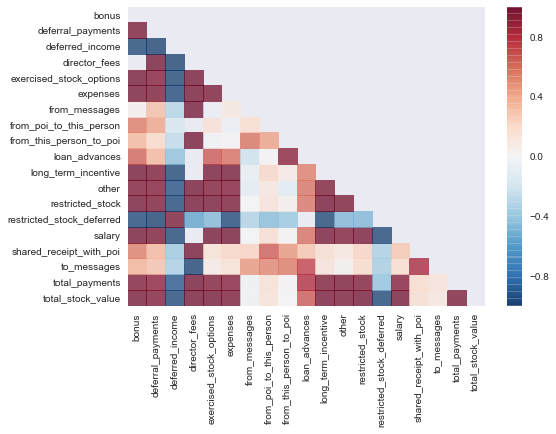

In [12]:
# I wanted to see some relevant realtionships among variables,
# but the scatterplot matrix was a little overcrowded with 20 variables
# instead, I used the heatmap to visualize the relationships

# reference: http://seaborn.pydata.org/examples/network_correlations.html
# reference: http://seaborn.pydata.org/generated/seaborn.heatmap.html

# calculate correlation
data_df_corr = data_df.corr()

# create mask
mask = np.zeros_like(data_df_corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

# draw heatmap
sns.heatmap(data_df_corr, cmap = 'RdBu_r', mask = mask, alpha = 0.7)
plt.show()

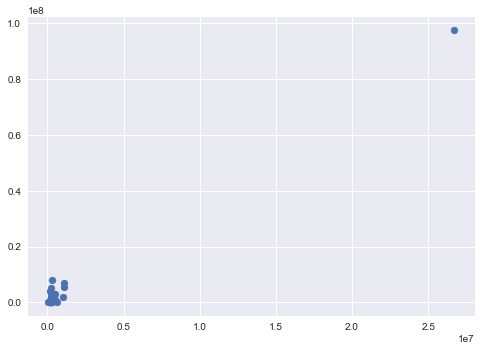

In [13]:
# it seems that most financial variables are highly correlated with one another
# let's pick one relationship to explore it further

plt.scatter(data = data_df, x = 'salary', y = 'bonus')
plt.show()

In [14]:
# there is a noticeable outlier here. What can this be?
data_df[data_df['salary'] > 25000000]

,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
TOTAL,97343619.0,32083396.0,-27992891.0,1398517.0,311764000.0,5235198.0,NaN,NaN,NaN,83925000.0,48521928.0,42667589.0,130322299.0,-7576788.0,26704229.0,NaN,NaN,309886585.0,434509511.0


In [15]:
# this is the 'TOTAL' entry, which is a summation of all other observation values
# let's get rid of this both from the dataframe and the original dictionary

data_df = data_df[data_df['salary'] < 25000000]
data_dict.pop('TOTAL')

{'bonus': 97343619,
 'deferral_payments': 32083396,
 'deferred_income': -27992891,
 'director_fees': 1398517,
 'email_address': 'NaN',
 'exercised_stock_options': 311764000,
 'expenses': 5235198,
 'from_messages': 'NaN',
 'from_poi_to_this_person': 'NaN',
 'from_this_person_to_poi': 'NaN',
 'loan_advances': 83925000,
 'long_term_incentive': 48521928,
 'other': 42667589,
 'poi': False,
 'restricted_stock': 130322299,
 'restricted_stock_deferred': -7576788,
 'salary': 26704229,
 'shared_receipt_with_poi': 'NaN',
 'to_messages': 'NaN',
 'total_payments': 309886585,
 'total_stock_value': 434509511}

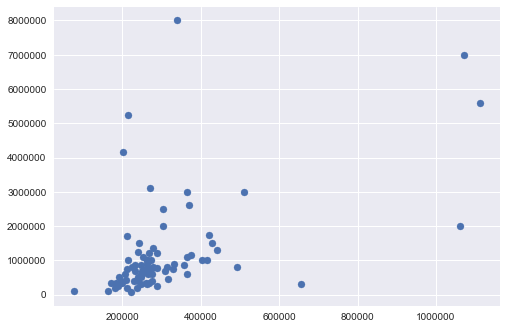

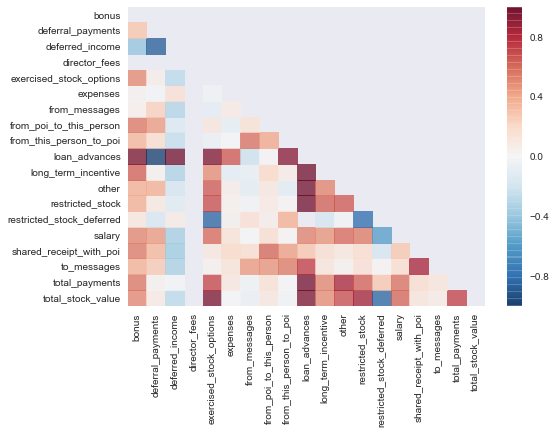

In [16]:
# This huge outlier must have had some effect on the heatmap
# let's plot the scatterplot and the heat map again

# create scatterplot
plt.scatter(data = data_df, x = 'salary', y = 'bonus')
plt.show()

# create heatmap
mask = np.zeros_like(data_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data_df.corr(), cmap = 'RdBu_r', mask = mask, alpha = 0.7)
plt.show()

In [17]:
# we still see some noticeable values on the scatterplot,
# but they are within an understanble range,
# so let's not get rid of those datapoints

# we can also see that the heatmap has changed a lot,
# and that the financial variables are lot less correlated
# with one another.
# the only exception is 'loan_advances',
# but this may be because without the 'TOTAL' observation,
# there are now only 3 valid data points,
# which is definitely not enough to conclude a meaningful correlation

## Exploratory Data Analysis: Summary
The dataset used for this project is a compilation of publicly available financial information of Enron employees and their email data. The raw dataset has 21 features (including the target variable 'poi') and 146 observations, of which 18 are identified as pois. 

A quick exploratory data analysis revealed that there were 2 outliers ('TOTAL', which added all the values, and 'THE TRAVEL AGENCY IN THE PARK', which is not an employee), which were removed. There were other notable datapoints too (Kenneth had total payments well over 100 million), but those were acceptable datapoints, considering that Kenneth was the CEO of the troubled company at the time.

Other interesting observations included:
1. Large amount of missing values for many variables (this will) affect the algorithm, tuning, and validation choices to come later
2. 'loan_advances' seem to have strong correlation with most other financial variables. The enron insider payment pdf document explains the variable as "Reflects total amount of loan advances, excluding repayments, provided by the Debtor in return for a promise of repayment. In certain instances, the terms of the promissory notes allow for the option to repay with stock of the company."
This is very intersting, especially the last part, where there is an 'option to repay with stock of the company'. This means that people can have loans with an equally arbitary financial value (stock). This calls for problem. IF that stock is for some reason not changed to actual cash, then this means that people cannot even pay for the loan advances!!


# 3. Feature selection & scaling

## features in the dataset

<strong>Financial Features</strong>

['salary', 'deferral_payments', 'total_payments', 'loan_advances', 'bonus', 'restricted_stock_deferred', 'deferred_income', 'total_stock_value', 'expenses', 'exercised_stock_options', 'other', 'long_term_incentive', 'restricted_stock', 'director_fees'] (all units are in US dollars)

<strong>Email features</strong>

['to_messages', 'email_address', 'from_poi_to_this_person', 'from_messages', 'from_this_person_to_poi', 'shared_receipt_with_poi'] (units are generally number of emails messages; notable exception is ‘email_address’, which is a text string)

<strong>POI</strong>

boolean, represented as integer

## creating new feature

In [18]:
# one thing I am interested in is the difference between stock value and actual salary.
# my guess is that people with higher stock value to salary proportion
# will have more interest in increasing the arbitary value of the company,
# because they can benefit from the equally increased stock values.
# As we have seen in the case of Kenneth Lay,
# pois may have higher stock value proportion to 'hard cash' (salary or bonus),
# because they benefit far more by increasing the face value of Enron

# find stock proportion from the stock and salary total
# if there is a NaN value for any of the two values, return NaN
for i in data_dict:
    emp = data_dict[i]
    try:
        emp['stock_salary_proportion'] = emp['total_stock_value'] / (emp['total_stock_value'] + emp['salary'])
    except:
        emp['stock_salary_proportion'] = 'NaN'
        
# check that new variable is added to the dictionary
data_dict['METTS MARK']

{'bonus': 600000,
 'deferral_payments': 'NaN',
 'deferred_income': 'NaN',
 'director_fees': 'NaN',
 'email_address': 'mark.metts@enron.com',
 'exercised_stock_options': 'NaN',
 'expenses': 94299,
 'from_messages': 29,
 'from_poi_to_this_person': 38,
 'from_this_person_to_poi': 1,
 'loan_advances': 'NaN',
 'long_term_incentive': 'NaN',
 'other': 1740,
 'poi': False,
 'restricted_stock': 585062,
 'restricted_stock_deferred': 'NaN',
 'salary': 365788,
 'shared_receipt_with_poi': 702,
 'stock_salary_proportion': 0.6153042015039175,
 'to_messages': 807,
 'total_payments': 1061827,
 'total_stock_value': 585062}

## Select best features

In [19]:
features_list = ['poi', 'salary', 'deferral_payments', 
                 'total_payments', 'loan_advances', 'bonus', 
                 'restricted_stock_deferred', 'deferred_income', 
                 'total_stock_value', 'expenses', 
                 'exercised_stock_options', 'other', 
                 'long_term_incentive', 'restricted_stock', 
                 'director_fees','to_messages', 
                 'from_poi_to_this_person', 'from_messages', 
                 'from_this_person_to_poi', 'shared_receipt_with_poi',
                 'stock_salary_proportion']

print('There are {} predictor variables.'.format(len(features_list) - 1))

There are 20 predictor variables.


There are too many predictor variables, and that may lead to overfitting, and slower processing time. We should limit our feature choices.

There are two main ways to choose 'best' features.

1. Use feature selection modules such as SelectKBest or SelectPercentile

2. Use feature_importances_ method after fitting data to a model(e.g. RandomForest)

The second method will give different points to different features depending on the classifier used, so while useful for testing out a single classifier, it's not approporiate to be used to select features to be tested out on multiple algorithms.

Let's use SelectKBest module from sklearn.

In [20]:
# create function to select k best features from a dataset

def select_k_best(data_dict, features_list, k):
    # import selectkbest module and f_classif for selector function
    from sklearn.feature_selection import SelectKBest, f_classif
    
    # split target and data
    data = featureFormat(data_dict, features_list)
    target, features = targetFeatureSplit(data)
    
    # create selector and fit data
    selector = SelectKBest(f_classif, k = k)
    selector.fit(features, target)
    
    # get scores of individual features and group with feature name
    scores = selector.scores_
    feature_scores = zip(features_list[1:], scores)
    
    # list of features in order of score
    scores_ordered = list(sorted(feature_scores, key = lambda x: x[1], reverse = True))
    
    # select k best features from the list
    k_best = scores_ordered[:k]
    
    # print scores of k best features
    print('scores of {} best features:\n'.format(k))
    for i in k_best:
        print(i)
        
    # return list of best features
    return [i[0] for i in k_best]

In [21]:
# create list of best features

k_list = [7, 9, 10, 11, 12, 13]
best_features = [select_k_best(data_dict, features_list, k) for k in k_list]

scores of 7 best features:

('exercised_stock_options', 24.815079733218194)
('total_stock_value', 24.182898678566879)
('bonus', 20.792252047181535)
('salary', 18.289684043404513)
('deferred_income', 11.458476579280369)
('long_term_incentive', 9.9221860131898225)
('restricted_stock', 9.2128106219771002)
scores of 9 best features:

('exercised_stock_options', 24.815079733218194)
('total_stock_value', 24.182898678566879)
('bonus', 20.792252047181535)
('salary', 18.289684043404513)
('deferred_income', 11.458476579280369)
('long_term_incentive', 9.9221860131898225)
('restricted_stock', 9.2128106219771002)
('stock_salary_proportion', 9.1770495770120686)
('total_payments', 8.7727777300916792)
scores of 10 best features:

('exercised_stock_options', 24.815079733218194)
('total_stock_value', 24.182898678566879)
('bonus', 20.792252047181535)
('salary', 18.289684043404513)
('deferred_income', 11.458476579280369)
('long_term_incentive', 9.9221860131898225)
('restricted_stock', 9.2128106219771002)


In [22]:
# create function to transform data dictionary to arrrays
# and split features and target
# note that when we use the select_k_best function,
# we do not have 'poi' in the features_list,
# so we would need to add poi to the beginning of the list

def format_data(data_dict, features_list):
    # add 'poi' to the beginning of the list if not in features_list
    if 'poi' not in features_list:
        features_list.insert(0, 'poi')
    
    data = featureFormat(data_dict, features_list)
    target, features = targetFeatureSplit(data)
    
    return target, features

# for now, let's use 7 features
target, features = format_data(data_dict, best_features[0])

In [23]:
# split data into train and test set
# I wasn't sure whether to split or scale the data first,
# but some research indicates that splitting first is better
# reference: https://stats.stackexchange.com/questions/95083/imputation-before-or-after-splitting-into-train-and-test
# reference2: https://stats.stackexchange.com/questions/77350/perform-feature-normalization-before-or-within-model-validation

# I used 70% for training
# I originally wanted to allocate 80% for training,
# but with such a small dataset, I thought that 70:30 is enough
# in this case

# import sklearn train_test_split module
from sklearn.model_selection import train_test_split

# split data into training 70 : test 30
train_X, test_X, train_y, test_y = train_test_split(features, target,
                                                   test_size = 0.3,
                                                   random_state = 42)

print('There are {} training points.'.format(len(train_X)))
print('There are {} test points.'.format(len(test_X)))

There are 97 training points.
There are 42 test points.


## Feature scaling

In [24]:
# financial have extremely large values,
# which means that without scaling, these values will
# have more weight in the machine learning process
# let's use minmax scaler to scale features

# import minmax scaler
from sklearn.preprocessing import MinMaxScaler

def scale_features(train_X, test_X):
    # create minmaxscalerinstance
    min_max_scaler = MinMaxScaler()
    
    # fit to training data and transform both train and test features
    min_max_scaler.fit(train_X)
    train_X = min_max_scaler.transform(train_X)
    test_X = min_max_scaler.transform(test_X)
    return train_X, test_X
    
train_X, test_X = scale_features(train_X, test_X)

# 4. Machine Learning

This is a binary classification task. This is also a supervised learning, because we know the outcome is either poi or not poi. There are several different algorithms we can use:

1. Decision tree
2. Naive Bayes(Gaussian)
3. Support vector machine classifier
4. Random forest classifier
5. Adaboost classifier
6. K nearest neigbors

In [25]:
# import algorithms
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

# create function to create a dataframe from classification report
# this makes it easier to view the report than just text data
# reference: https://stackoverflow.com/questions/39662398/scikit-learn-output-metrics-classification-report-into-csv-tab-delimited-format

def classification_report_to_df(report):
    report_data = []
    lines = report.split('\n')
    for line in lines[2:-3]:
        row = {}
        row_data = line.split('      ')
        row['precision'] = float(row_data[2].strip())
        row['recall'] = float(row_data[3].strip())
        row['f1-score'] = float(row_data[4].strip())
        row['support'] = float(row_data[5].strip())
        report_data.append(row)
        
    result = lines[-2].split('      ')
    result = [float(i.strip()) for i in result[1:]]
    
    df_test = pd.DataFrame.from_dict(report_data)
    df_test = df_test.append(pd.DataFrame([result],
                                        columns = ['precision','recall','f1-score','support']),
                           ignore_index = True)
    df_test.index = ['non-poi', 'poi', 'avg/total']
    
    return df_test

classifier_name = ['Decision tree', 'Gaussian Naive Bayes',
                   'SVC', 'Random Forest', 'AdaBoost','KNN']
classifier = [DecisionTreeClassifier(),
             GaussianNB(),
             SVC(),
             RandomForestClassifier(),
             AdaBoostClassifier(),
             KNeighborsClassifier()]

# create function to test modules with data and return classification report
def get_scores(train_X, test_X, train_y, test_y, 
               classifier_list, classifier_names):
    
    for i, model in enumerate(classifier):
        clf = classifier[i]
        clf.fit(train_X, train_y)
        pred = clf.predict(test_X)
        report = classification_report(test_y, pred)
        report_df = classification_report_to_df(report)
        print(classifier_names[i],'\n')
        print(report_df, '\n')

get_scores(train_X, test_X, train_y, test_y,
          classifier, classifier_name)

Decision tree 

           f1-score  precision  recall  support
non-poi        0.86       0.86    0.86     36.0
poi            0.17       0.17    0.17      6.0
avg/total      0.76       0.76    0.76     42.0 

Gaussian Naive Bayes 

           f1-score  precision  recall  support
non-poi        0.95       0.90    1.00     36.0
poi            0.50       1.00    0.33      6.0
avg/total      0.88       0.91    0.90     42.0 

SVC 

           f1-score  precision  recall  support
non-poi        0.92       0.86    1.00     36.0
poi            0.00       0.00    0.00      6.0
avg/total      0.79       0.73    0.86     42.0 

Random Forest 

           f1-score  precision  recall  support
non-poi        0.92       0.86    1.00     36.0
poi            0.00       0.00    0.00      6.0
avg/total      0.79       0.73    0.86     42.0 

AdaBoost 

           f1-score  precision  recall  support
non-poi        0.89       0.89    0.89     36.0
poi            0.33       0.33    0.33      6.0
avg/tota

/Users/jk6653284/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jk6653284/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/jk6653284/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1113: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


from the scores alone, it seems that overall, the Gaussian NB has the highest precision and rcall score overall. Interestingly enough, while the other models have a higher recall score, both Decision Tree and NB have slightly higher precision score.

Bearing this in mind, I must decide which evaluation metric is more important in this case. Thus, it is important to understand what each metric means for this case.

Precision measures how many of the classifications predicted as positive were truly positive. A lower score means that there are a lot of false positives in the prediction pool. In this case, a lower score means that innocent people are classified as 'poi's.

Recall, on the other hand, measures how many pois were identified from all the actual pois. A lower score means that the model cannot identify a poi from the people. Thus, a model with a low recall score has a high potential of letting go of actual poi's.

In my opinion, a higher recall score is more important in this case. Being one of the largest financial fraud in the history and affecting hundreds of innocent employees and the economy in general, it is critical that those responsible are convicted rightfully. In the process, we may be selecting a model in expense of possibly accusing innocent employees as pois. However, it is better safe than sorry, and the poi identification result of a machine learning is just preliminary step to catch the real culprits. Further investigations based on this result will certainly reveal innocent employees. For now, selecting a model that will capture all possible suspects is the priority.

## Parameter tuning

In [26]:
# let's see if we can tweak the parameters for the algorithms
# and increase the scores
# we are going to use the GridSearchCV module to test find the best parameters
# and use the StratifiedShuffleSplit module to cross-validate the model

# import GridSearchCV and StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, StratifiedShuffleSplit

# define scoring method
# import precison score, recall, and f1 score
from sklearn.metrics import precision_score, recall_score, f1_score

# function that only returns f1 IF both the precision and the recall scores are above 0.3
# the lower threshold
def scoring(estimator, features_test, labels_test):
    labels_pred = estimator.predict(features_test)
    p = precision_score(labels_test, labels_pred, average='micro')
    r = recall_score(labels_test, labels_pred, average='micro')
    if p > 0.3 and r > 0.3:
        return f1_score(labels_test, labels_pred, average='macro')
    return 0



# reference for rf parameter tuning: https://www.analyticsvidhya.com/blog/2015/06/tuning-random-forest-model/
# reference for rf parameter tuning: https://www.hackerearth.com/practice/machine-learning/machine-learning-algorithms/tutorial-random-forest-parameter-tuning-r/tutorial/


# define parameters
param_dt = {'max_features': [3,4,5],
           'criterion': ('gini', 'entropy'),
           'max_depth': [1,2,3,4,5,6],
           'min_samples_split': [2,3],
           'min_samples_leaf': [1,2,3,4,5]}
param_rf = {'max_features': [3,4,5],
           'criterion': ('gini', 'entropy'),
           'min_samples_leaf': [1,2,3,4,5],
           'n_estimators': [10,50,100,500]}
param_ada = {'n_estimators': [10,50,100,500],
            'algorithm': ('SAMME','SAMME.R'),
            'learning_rate': [0.05, 0.1, 1.0] }
param_svc = {'C': [1,10,100,1000],
             'gamma': [0.001, 0.0001]}
param_knn = {'n_neighbors': [3, 5, 7, 9],
            'weights': ('uniform', 'distance'),
            'metric': ('minkowski','euclidean'),
            'algorithm': ('auto', 'ball_tree', 'kd_tree', 'brute')}
param_nb = {}

params = []
params.append(param_dt)
params.append(param_rf)
params.append(param_ada)
params.append(param_svc)
params.append(param_knn)
params.append(param_nb)

# define classifiers
classifier_name = ['Decision tree', 'Random Forest', 
                   'AdaBoost','SVC','KNN','Gaussian Naive Bayes' ]
classifier = [DecisionTreeClassifier(),
              RandomForestClassifier(),
              AdaBoostClassifier(),
              SVC(kernel = 'rbf'),
              KNeighborsClassifier(),
              GaussianNB()]

# create function to find the best estimator for an algorithm
# and retunrs that estimator
def find_best_estim(classifier, classifier_name, 
                    param, scoring, features, target):
    # create StratifiedShuffleSplit instance
    cv = StratifiedShuffleSplit(n_splits = 10, test_size = 0.1,
                               random_state = 42)
    
    # scale features
    min_max_scaler = MinMaxScaler()
    features = min_max_scaler.fit_transform(features)
    
    # create grid and fit data
    t0 = time()
    clf = classifier
    
    grid = GridSearchCV(clf, param, cv=cv, scoring=scoring)
    grid.fit(features, target)
    
    print(classifier_name)
    print('time taken to process grid: {}'.format(time() - t0))
    print('best parameters: {}'.format(grid.best_params_))
    print('best score: {}'.format(grid.best_score_))
    
    return grid.best_estimator_

# import warnings to module to ignore the warnings
import warnings
warnings.filterwarnings('ignore')

In [27]:
# let's try with different number of features

# find target and features for each number of features
target7, features7 = format_data(data_dict, best_features[0])
target9, features9 = format_data(data_dict, best_features[1])
target10, features10 = format_data(data_dict, best_features[2])
target11, features11 = format_data(data_dict, best_features[3])
target12, features12 = format_data(data_dict, best_features[4])
target13, features13 = format_data(data_dict, best_features[5])

In [78]:
best_estimators_7 = []

for i, model in enumerate(classifier):
    best_estimators_7.append(find_best_estim(model, classifier_name[i], params[i],
                                          scoring, features7, target7))


Decision tree
time taken to process grid: 13.836421251296997
best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 2}
best score: 0.6533293807641635
Random Forest
time taken to process grid: 264.1563370227814
best parameters: {'criterion': 'gini', 'max_features': 3, 'min_samples_leaf': 1, 'n_estimators': 10}
best score: 0.6511666666666667
AdaBoost
time taken to process grid: 54.565468311309814
best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 0.05, 'n_estimators': 10}
best score: 0.5957948717948717
SVC
time taken to process grid: 0.3277440071105957
best parameters: {'C': 1000, 'gamma': 0.001}
best score: 0.49456410256410255
KNN
time taken to process grid: 2.967392921447754
best parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 7, 'weights': 'uniform'}
best score: 0.4615384615384615
Gaussian Naive Bayes
time taken to process grid: 0.037918806076049805
best parameters: {}
best score: 0.60885309

In [79]:
best_estimators_9 = []

for i, model in enumerate(classifier):
    best_estimators_9.append(find_best_estim(model, classifier_name[i], params[i],
                                          scoring, features9, target9))

Decision tree
time taken to process grid: 13.837580919265747
best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
best score: 0.6951566951566952
Random Forest
time taken to process grid: 265.5463421344757
best parameters: {'criterion': 'entropy', 'max_features': 3, 'min_samples_leaf': 3, 'n_estimators': 10}
best score: 0.6395502645502644
AdaBoost
time taken to process grid: 54.3379111289978
best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 50}
best score: 0.6743304843304844
SVC
time taken to process grid: 0.3517019748687744
best parameters: {'C': 1, 'gamma': 0.001}
best score: 0.46428571428571425
KNN
time taken to process grid: 3.039900302886963
best parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 5, 'weights': 'uniform'}
best score: 0.49735449735449727
Gaussian Naive Bayes
time taken to process grid: 0.04219508171081543
best parameters: {}
best score: 0.70187871387

In [80]:
best_estimators_10 = []

for i, model in enumerate(classifier):
    best_estimators_10.append(find_best_estim(model, classifier_name[i], params[i],
                                          scoring, features10, target10))

Decision tree
time taken to process grid: 13.442389965057373
best parameters: {'criterion': 'entropy', 'max_depth': 6, 'max_features': 3, 'min_samples_leaf': 5, 'min_samples_split': 3}
best score: 0.7765000000000001
Random Forest
time taken to process grid: 256.31263518333435
best parameters: {'criterion': 'gini', 'max_features': 5, 'min_samples_leaf': 1, 'n_estimators': 10}
best score: 0.6541005291005291
AdaBoost
time taken to process grid: 54.222532987594604
best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100}
best score: 0.6684354904354903
SVC
time taken to process grid: 0.37912797927856445
best parameters: {'C': 1, 'gamma': 0.001}
best score: 0.46428571428571425
KNN
time taken to process grid: 3.0739550590515137
best parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}
best score: 0.4933862433862434
Gaussian Naive Bayes
time taken to process grid: 0.05191802978515625
best parameters: {}
best score: 0.699741

In [82]:
best_estimators_11 = []

for i, model in enumerate(classifier):
    best_estimators_11.append(find_best_estim(model, classifier_name[i], params[i],
                                          scoring, features11, target11))

Decision tree
time taken to process grid: 14.008370876312256
best parameters: {'criterion': 'gini', 'max_depth': 6, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 2}
best score: 0.6985907610907612
Random Forest
time taken to process grid: 301.1607701778412
best parameters: {'criterion': 'gini', 'max_features': 4, 'min_samples_leaf': 2, 'n_estimators': 10}
best score: 0.6603072853072853
AdaBoost
time taken to process grid: 63.76996898651123
best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100}
best score: 0.6705722425722425
SVC
time taken to process grid: 0.31575989723205566
best parameters: {'C': 1, 'gamma': 0.001}
best score: 0.46428571428571425
KNN
time taken to process grid: 2.8885529041290283
best parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}
best score: 0.4933862433862434
Gaussian Naive Bayes
time taken to process grid: 0.0414731502532959
best parameters: {}
best score: 0.681260868760

In [83]:
best_estimators_12 = []

for i, model in enumerate(classifier):
    best_estimators_12.append(find_best_estim(model, classifier_name[i], params[i],
                                          scoring, features12, target12))

Decision tree
time taken to process grid: 13.29436707496643
best parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 2}
best score: 0.7199328449328448
Random Forest
time taken to process grid: 271.99715089797974
best parameters: {'criterion': 'entropy', 'max_features': 3, 'min_samples_leaf': 2, 'n_estimators': 10}
best score: 0.6375661375661376
AdaBoost
time taken to process grid: 66.26233196258545
best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100}
best score: 0.7130907610907612
SVC
time taken to process grid: 0.4065589904785156
best parameters: {'C': 1, 'gamma': 0.001}
best score: 0.46428571428571425
KNN
time taken to process grid: 3.7389659881591797
best parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}
best score: 0.4705250305250306
Gaussian Naive Bayes
time taken to process grid: 0.06872415542602539
best parameters: {}
best score: 0.681260

In [84]:
best_estimators_13 = []

for i, model in enumerate(classifier):
    best_estimators_13.append(find_best_estim(model, classifier_name[i], params[i],
                                          scoring, features13, target13))

Decision tree
time taken to process grid: 13.55265998840332
best parameters: {'criterion': 'gini', 'max_depth': 5, 'max_features': 5, 'min_samples_leaf': 2, 'min_samples_split': 3}
best score: 0.7663504273504274
Random Forest
time taken to process grid: 254.51702404022217
best parameters: {'criterion': 'gini', 'max_features': 3, 'min_samples_leaf': 2, 'n_estimators': 10}
best score: 0.6642755392755392
AdaBoost
time taken to process grid: 54.298818826675415
best parameters: {'algorithm': 'SAMME.R', 'learning_rate': 1.0, 'n_estimators': 100}
best score: 0.7528490028490029
SVC
time taken to process grid: 0.3325381278991699
best parameters: {'C': 1, 'gamma': 0.001}
best score: 0.46428571428571425
KNN
time taken to process grid: 2.9842889308929443
best parameters: {'algorithm': 'auto', 'metric': 'minkowski', 'n_neighbors': 3, 'weights': 'uniform'}
best score: 0.4703724053724054
Gaussian Naive Bayes
time taken to process grid: 0.040495872497558594
best parameters: {}
best score: 0.6791241166

In [93]:
# I decided to see in more detail only the classifiers that had more than 0.7 f1 socre

Best Decision Tree parameters: {'criterion': 'gini', 'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 1, 'min_samples_split': 3}
Best score: 0.7341524216524217
processing time: 141.49505400657654


In [97]:
sys.path.append('ud120-projects/final_project')
from tester import test_classifier

test_classifier(best_estimators_10[0], data_dict, best_features[2], folds = 1000)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=6,
            max_features=3, max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=5, min_samples_split=3,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
	Accuracy: 0.82587	Precision: 0.27794	Recall: 0.19150	F1: 0.22676	F2: 0.20420
	Total predictions: 15000	True positives:  383	False positives:  995	False negatives: 1617	True negatives: 12005



In [95]:
test_classifier(best_estimators_13[2], data_dict, best_features[5], folds = 1000)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=100, random_state=None)
	Accuracy: 0.83667	Precision: 0.35158	Recall: 0.26650	F1: 0.30319	F2: 0.28005
	Total predictions: 15000	True positives:  533	False positives:  983	False negatives: 1467	True negatives: 12017



In [98]:
test_classifier(best_estimators_9[5], data_dict, best_features[1], folds = 1000)

GaussianNB(priors=None)
	Accuracy: 0.84100	Precision: 0.38355	Recall: 0.31700	F1: 0.34711	F2: 0.32840
	Total predictions: 15000	True positives:  634	False positives: 1019	False negatives: 1366	True negatives: 11981



In [28]:
# In the end, I chose the GaussianNB with 9 features. This was certainly a surprise,
# because even without the parameter tuned, it still showed decent recall and precision scores.